In [ ]:
import pickle
import numpy as np
import sys,os
from scipy.sparse import load_npz
from util1 import *

#Upload example data

In [ ]:
### An example of neighborhood motif discovery of SMAD5 using chromosome 2
### To generate inputs in more chromosomes, you can use 'util1.generate_inputs' function with files 'example/input_sample_poi.pickle' and downloaded reference genome data

with open('example/input_sample_poi.pickle','rb') as f:
  input_sample_poi=pickle.load(f)
with open('chromatin_feature.pickle','rb') as f:
  chromatin_feature=pickle.load(f)
inputs={}
labels={}
neighs={}
inputs[2]=np.load('example/chr2.npy')
neighs[2]=np.load('example/neighbors_chr2.npy')
print(neighs[2].shape,inputs[2].shape)
labels[2]=load_npz('example/chr2.npz')

(249962, 61) (249962, 4, 1000)


# generate the neighborhood motif for RBFOX2

In [ ]:
inspect_tf='RBFOX2'
sequence_grad,sequence_input= filter_sequence(inputs,neighs,labels,input_sample_poi, inspect_tf
                                              ,contact_threshold=0.4, score_threshold=0.3,seq_threshold=300)
### contact_threshold: the threshold to filter contacts with low attribution scores
### score_threshold: the threshold to filter binding sites with low prediction scores
### seq_threshold: number of sequence you want to collect
print('The number of selected sequence to generate neighborhood motif is %s'%(sequence_grad.shape[0]))

cuda:0
[614 680]
(14390,)
1 sequences are found
2 sequences are found
5 sequences are found
6 sequences are found
7 sequences are found
13 sequences are found
14 sequences are found
16 sequences are found
17 sequences are found
18 sequences are found
21 sequences are found
22 sequences are found
23 sequences are found
30 sequences are found
33 sequences are found
34 sequences are found
35 sequences are found
41 sequences are found
45 sequences are found
47 sequences are found
51 sequences are found
52 sequences are found
53 sequences are found
54 sequences are found
56 sequences are found
60 sequences are found
63 sequences are found
64 sequences are found
66 sequences are found
67 sequences are found
69 sequences are found
83 sequences are found
86 sequences are found
90 sequences are found
91 sequences are found
93 sequences are found
94 sequences are found
95 sequences are found
96 sequences are found
97 sequences are found
98 sequences are found
100 sequences are found
103 sequence

#Run TF-MoDISco to generate motifs from neighbor sequences' attribution scores

In [ ]:
# !pip install modisco
import modisco
from collections import OrderedDict
task_to_scores = OrderedDict()
task_to_hyp_scores = OrderedDict()
# print(sequence_grad.shape)
gradient=sequence_grad[:200,:,:]
gradient=np.swapaxes(np.array(gradient),1,2)
input=sequence_input[:200,:,:]
input=np.swapaxes(input,1,2)
tasks=["task0"]
for task in tasks:
    task_to_scores[task] = [gradient[i,:,:]*input[i,:,:] for i in range(gradient.shape[0])]
    task_to_hyp_scores[task] = [gradient[i,:,:] for i in range(gradient.shape[0])]
onehot_data =[input[i,:,:] for i in range(gradient.shape[0])]

MEMORY 21.334798336
On task task0
Computing windowed sums on original
Generating null dist
peak(mu)= 0.0008696707563794916
Computing threshold
For increasing = True , the minimum IR precision was 0.09078294234333237 occurring at 1.2386590242385864e-07 implying a frac_neg of 0.09984738141330957
To be conservative, adjusted frac neg is 0.95
For increasing = False , the minimum IR precision was 0.2672714948641744 occurring at -1.7881393432617188e-07 implying a frac_neg of 0.3647619725325554
To be conservative, adjusted frac neg is 0.95
Thresholds from null dist were -0.19069430232048035  and  0.1523297280073166 with frac passing 0.031061224489795917
Final raw thresholds are -0.19069430232048035  and  0.1523297280073166
Final transformed thresholds are -0.9765663265306123  and  0.9630663265306122


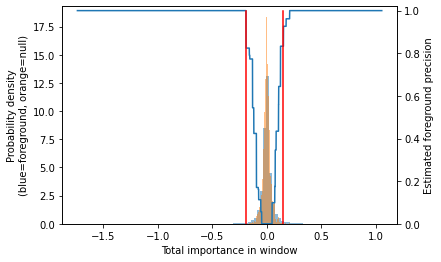

Got 537 coords
After resolving overlaps, got 537 seqlets
Across all tasks, the weakest transformed threshold used was: 0.9629663265306122
MEMORY 21.334806528
537 identified in total
2 activity patterns with support >= 100 out of 2 possible patterns
Metacluster sizes:  [345, 192]
Idx to activities:  {0: '1', 1: '-1'}
MEMORY 21.334806528
On metacluster 1
Metacluster size 192
Relevant tasks:  ('task0',)
Relevant signs:  (-1,)
TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 192
(Round 1) Computing coarse affmat
MEMORY 21.334802432
Beginning embedding computation
MEMORY 21.334802432


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 192 out of 192 | elapsed:   11.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 192 out of 192 | elapsed:   10.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Constructing csr matrix...
csr matrix made in 0.04417109489440918 s


[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:    0.6s finished


Constructing csr matrix...
csr matrix made in 0.04249143600463867 s
Finished embedding computation in 22.95 s
MEMORY 21.33026816
Starting affinity matrix computations
MEMORY 21.33026816
Batching in slices of size 192


100%|██████████| 1/1 [00:01<00:00,  1.09s/it]

Finished affinity matrix computations in 1.1 s
MEMORY 21.33026816
(Round 1) Computed coarse affmat
MEMORY 21.33026816
(Round 1) Computing affinity matrix on nearest neighbors
MEMORY 21.33026816
Launching nearest neighbors affmat calculation job
MEMORY 21.33026816


Parallel runs completed
MEMORY 21.330300928
Job completed in: 1.24 s
MEMORY 21.330300928
Launching nearest neighbors affmat calculation job
MEMORY 21.330300928
Parallel runs completed
MEMORY 21.330276352
Job completed in: 1.14 s
MEMORY 21.330276352
(Round 1) Computed affinity matrix on nearest neighbors in 2.57 s
MEMORY 21.330300928
Filtered down to 183 of 192
(Round 1) Retained 183 rows out of 192 after filtering
MEMORY 21.330300928
(Round 1) Computing density adapted affmat
MEMORY 21.330300928
Symmetrizing nearest neighbors
Computing betas for density adaptation
Computing normalizing denominators
(Round 1) Computing clustering
MEMORY 21.330300928
Beginning preprocessing + Leiden
Affmat shape: 183


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.8s


Quality: 0.04219595496026266
Got 6 clusters after round 1
Counts:
{1: 43, 2: 28, 0: 43, 5: 16, 4: 26, 3: 27}
MEMORY 21.330300928
(Round 1) Aggregating seqlets in each cluster
MEMORY 21.330300928
Aggregating for cluster 0 with 43 seqlets
MEMORY 21.330300928
Skipped 3 due to duplicates
Trimming eliminated 0 seqlets out of 40
Removed 2 duplicate seqlets
Aggregating for cluster 1 with 43 seqlets
MEMORY 21.330300928


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    4.4s finished


Removed 1 duplicate seqlets
Skipped 11 due to duplicates
Trimming eliminated 0 seqlets out of 31
Aggregating for cluster 2 with 28 seqlets
MEMORY 21.330300928
Trimming eliminated 0 seqlets out of 28
Aggregating for cluster 3 with 27 seqlets
MEMORY 21.330300928
Skipped 1 due to duplicates
Trimming eliminated 0 seqlets out of 26
Aggregating for cluster 4 with 26 seqlets
MEMORY 21.330300928
Trimming eliminated 0 seqlets out of 26
Aggregating for cluster 5 with 16 seqlets
MEMORY 21.330300928
Trimming eliminated 0 seqlets out of 16
(Round 2) num seqlets: 165
(Round 2) Computing coarse affmat
MEMORY 21.330300928
Beginning embedding computation
MEMORY 21.330300928


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 165 out of 165 | elapsed:   14.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done 165 out of 165 | elapsed:   14.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 165 out of 165 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Constructing csr matrix...
csr matrix made in 0.03725433349609375 s


[Parallel(n_jobs=1)]: Done 165 out of 165 | elapsed:    0.5s finished


Constructing csr matrix...
csr matrix made in 0.036908864974975586 s
Finished embedding computation in 29.74 s
MEMORY 21.330313216
Starting affinity matrix computations
MEMORY 21.330313216
Batching in slices of size 165


100%|██████████| 1/1 [00:01<00:00,  1.09s/it]

Finished affinity matrix computations in 1.1 s
MEMORY 21.330313216
(Round 2) Computed coarse affmat
MEMORY 21.330313216
(Round 2) Computing affinity matrix on nearest neighbors
MEMORY 21.330313216
Launching nearest neighbors affmat calculation job
MEMORY 21.330313216


Parallel runs completed
MEMORY 21.330337792
Job completed in: 0.84 s
MEMORY 21.330337792
Launching nearest neighbors affmat calculation job
MEMORY 21.330337792
Parallel runs completed
MEMORY 21.330313216
Job completed in: 0.84 s
MEMORY 21.330313216
(Round 2) Computed affinity matrix on nearest neighbors in 1.85 s
MEMORY 21.330313216
Not applying filtering for rounds above first round
MEMORY 21.330313216
(Round 2) Computing density adapted affmat
MEMORY 21.330313216
Symmetrizing nearest neighbors
Computing betas for density adaptation
Computing normalizing denominators
(Round 2) Computing clustering
MEMORY 21.330345984
Beginning preprocessing + Leiden
Affmat shape: 165


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.7s


Quality: 0.046205806568931924
Got 5 clusters after round 2
Counts:
{1: 37, 4: 24, 0: 37, 3: 31, 2: 36}
MEMORY 21.33035008
(Round 2) Aggregating seqlets in each cluster
MEMORY 21.33035008
Aggregating for cluster 0 with 37 seqlets
MEMORY 21.33035008
Skipped 3 due to duplicates
Trimming eliminated 0 seqlets out of 34
Aggregating for cluster 1 with 37 seqlets
MEMORY 21.33035008
Trimming eliminated 0 seqlets out of 37
Aggregating for cluster 2 with 36 seqlets
MEMORY 21.33035008


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    4.3s finished


Skipped 4 due to duplicates
Trimming eliminated 0 seqlets out of 32
Aggregating for cluster 3 with 31 seqlets
MEMORY 21.33035008
Trimming eliminated 0 seqlets out of 31
Aggregating for cluster 4 with 24 seqlets
MEMORY 21.33035008
Skipped 1 due to duplicates
Trimming eliminated 0 seqlets out of 23
Got 5 clusters
Splitting into subclusters...
MEMORY 21.33035008
Inspecting pattern 0 for spurious merging
Inspecting pattern 1 for spurious merging
Inspecting pattern 2 for spurious merging
Inspecting pattern 3 for spurious merging
Inspecting pattern 4 for spurious merging
Merging on 5 clusters
MEMORY 21.33035008
On merging iteration 1
Numbers for each pattern pre-subsample: [34, 37, 32, 31, 23]
Numbers after subsampling: [34, 37, 32, 31, 23]
Computing sims for pattern 0
Computed sims for pattern 0 in 0.2632007598876953 s
Computing sims for pattern 1
Computed sims for pattern 1 in 0.27785778045654297 s
Computing sims for pattern 2
Computed sims for pattern 2 in 0.23808050155639648 s
Computing 

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  37 out of  37 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


[t-SNE] Iteration 950: error = 0.5471131, gradient norm = 0.0000241 (50 iterations in 0.013s)
[t-SNE] Iteration 1000: error = 0.5468537, gradient norm = 0.0000194 (50 iterations in 0.009s)
[t-SNE] Iteration 1000: did not make any progress during the last 300 episodes. Finished.
[t-SNE] KL divergence after 1000 iterations: 0.546854
[t-SNE] Computed conditional probabilities for sample 37 / 37
[t-SNE] Mean sigma: 1125899906842624.000000
Beginning preprocessing + Leiden
Affmat shape: 37


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.2s


Quality: 3.463895836830574e-14


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  34 out of  34 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


Got subclusters: Counter({0: 37})
On pattern 1
[t-SNE] Computing 33 nearest neighbors...
[t-SNE] Indexed 34 samples in 0.001s...
[t-SNE] Computed neighbors for 34 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 34 / 34
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.003s
[t-SNE] Iteration 50: error = 45.4729233, gradient norm = 0.3850566 (50 iterations in 0.009s)
[t-SNE] Iteration 100: error = 41.4449654, gradient norm = 0.6544425 (50 iterations in 0.009s)
[t-SNE] Iteration 150: error = 50.2451172, gradient norm = 0.5466656 (50 iterations in 0.008s)
[t-SNE] Iteration 200: error = 48.2897339, gradient norm = 0.4883336 (50 iterations in 0.008s)
[t-SNE] Iteration 250: error = 43.7723083, gradient norm = 0.5463325 (50 iterations in 0.008s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.772308
[t-SNE] Iteration 300: error = 0.5802802, gradient norm = 0.0008364 (50 iterations in 0.008s)
[t-SNE] Ite

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.2s


Quality: -1.0069722833350307e-13


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 out of  32 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


Got subclusters: Counter({0: 34})
On pattern 2
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 32 samples in 0.001s...
[t-SNE] Computed neighbors for 32 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 32 / 32
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.003s
[t-SNE] Iteration 50: error = 45.0391502, gradient norm = 0.5915984 (50 iterations in 0.007s)
[t-SNE] Iteration 100: error = 41.5301819, gradient norm = 0.6421952 (50 iterations in 0.008s)
[t-SNE] Iteration 150: error = 41.7794228, gradient norm = 0.5639641 (50 iterations in 0.008s)
[t-SNE] Iteration 200: error = 42.5937386, gradient norm = 0.5189880 (50 iterations in 0.008s)
[t-SNE] Iteration 250: error = 48.9627533, gradient norm = 0.4000197 (50 iterations in 0.008s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.962753
[t-SNE] Iteration 300: error = 0.5347084, gradient norm = 0.0006481 (50 iterations in 0.009s)
[t-SNE] Ite

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.2s


Quality: 2.0650148258028073e-14


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  31 out of  31 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


Got subclusters: Counter({0: 32})
On pattern 3
[t-SNE] Computing 30 nearest neighbors...
[t-SNE] Indexed 31 samples in 0.001s...
[t-SNE] Computed neighbors for 31 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 31 / 31
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.003s
[t-SNE] Iteration 50: error = 44.0677071, gradient norm = 0.6664385 (50 iterations in 0.008s)
[t-SNE] Iteration 100: error = 44.3436432, gradient norm = 0.4917835 (50 iterations in 0.009s)
[t-SNE] Iteration 150: error = 45.2626801, gradient norm = 0.4731013 (50 iterations in 0.008s)
[t-SNE] Iteration 200: error = 42.3066177, gradient norm = 0.4319640 (50 iterations in 0.010s)
[t-SNE] Iteration 250: error = 42.6013489, gradient norm = 0.7314947 (50 iterations in 0.009s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.601349
[t-SNE] Iteration 300: error = 0.7107455, gradient norm = 0.0011175 (50 iterations in 0.007s)
[t-SNE] Ite

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.2s


Quality: 9.703349235223737e-14
Got subclusters: Counter({0: 31})
On metacluster 0
Metacluster size 345
Relevant tasks:  ('task0',)
Relevant signs:  (1,)
TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 345
(Round 1) Computing coarse affmat
MEMORY 21.33035008
Beginning embedding computation
MEMORY 21.33035008


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 338 out of 345 | elapsed:   16.8s remaining:    0.3s
[Parallel(n_jobs=4)]: Done 345 out of 345 | elapsed:   17.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 338 out of 345 | elapsed:   16.9s remaining:    0.3s
[Parallel(n_jobs=4)]: Done 345 out of 345 | elapsed:   17.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 345 out of 345 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Constructing csr matrix...
csr matrix made in 0.08126544952392578 s


[Parallel(n_jobs=1)]: Done 345 out of 345 | elapsed:    1.0s finished


Constructing csr matrix...
csr matrix made in 0.07847404479980469 s
Finished embedding computation in 37.44 s
MEMORY 21.330423808
Starting affinity matrix computations
MEMORY 21.330423808
Batching in slices of size 345


100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

Finished affinity matrix computations in 1.15 s
MEMORY 21.33049344
(Round 1) Computed coarse affmat
MEMORY 21.33049344
(Round 1) Computing affinity matrix on nearest neighbors
MEMORY 21.33049344


Launching nearest neighbors affmat calculation job
MEMORY 21.33049344
Parallel runs completed
MEMORY 21.330481152
Job completed in: 3.45 s
MEMORY 21.330481152
Launching nearest neighbors affmat calculation job
MEMORY 21.330481152
Parallel runs completed
MEMORY 21.330464768
Job completed in: 3.25 s
MEMORY 21.330464768
(Round 1) Computed affinity matrix on nearest neighbors in 6.92 s
MEMORY 21.330518016
Filtered down to 341 of 345
(Round 1) Retained 341 rows out of 345 after filtering
MEMORY 21.330518016
(Round 1) Computing density adapted affmat
MEMORY 21.330518016
Symmetrizing nearest neighbors
Computing betas for density adaptation
Computing normalizing denominators
(Round 1) Computing clustering
MEMORY 21.330673664
Beginning preprocessing + Leiden
Affmat shape: 341


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.2s


Quality: 0.019214334377800877
Quality: 0.019226723401868696
Quality: 0.019343196516707406
Got 6 clusters after round 1
Counts:
{1: 82, 2: 60, 3: 38, 4: 36, 5: 2, 0: 123}
MEMORY 21.330722816
(Round 1) Aggregating seqlets in each cluster
MEMORY 21.330722816
Aggregating for cluster 0 with 123 seqlets
MEMORY 21.330722816


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    7.1s finished


Skipped 1 due to duplicates
Trimming eliminated 0 seqlets out of 122
Skipped 2 seqlets that went over the sequence edge during flank expansion
Removed 1 duplicate seqlets
Aggregating for cluster 1 with 82 seqlets
MEMORY 21.330722816
Skipped 8 due to duplicates
Trimming eliminated 0 seqlets out of 74
Removed 1 duplicate seqlets
Aggregating for cluster 2 with 60 seqlets
MEMORY 21.330722816
Skipped 6 due to duplicates
Trimming eliminated 0 seqlets out of 54
Aggregating for cluster 3 with 38 seqlets
MEMORY 21.330722816
Removed 1 duplicate seqlets
Skipped 3 due to duplicates
Trimming eliminated 0 seqlets out of 34
Aggregating for cluster 4 with 36 seqlets
MEMORY 21.330722816
Skipped 3 due to duplicates
Trimming eliminated 0 seqlets out of 33
Aggregating for cluster 5 with 2 seqlets
MEMORY 21.330722816
Trimming eliminated 0 seqlets out of 2
(Round 2) num seqlets: 314
(Round 2) Computing coarse affmat
MEMORY 21.330722816
Beginning embedding computation
MEMORY 21.330722816


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   16.8s
[Parallel(n_jobs=4)]: Done 314 out of 314 | elapsed:   27.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   16.9s
[Parallel(n_jobs=4)]: Done 314 out of 314 | elapsed:   27.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 314 out of 314 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Constructing csr matrix...
csr matrix made in 0.07126879692077637 s


[Parallel(n_jobs=1)]: Done 314 out of 314 | elapsed:    0.9s finished


Constructing csr matrix...
csr matrix made in 0.07050037384033203 s
Finished embedding computation in 57.14 s
MEMORY 21.330849792
Starting affinity matrix computations
MEMORY 21.330849792
Batching in slices of size 314


100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

Finished affinity matrix computations in 1.15 s
MEMORY 21.330849792
(Round 2) Computed coarse affmat
MEMORY 21.330849792
(Round 2) Computing affinity matrix on nearest neighbors
MEMORY 21.330849792


Launching nearest neighbors affmat calculation job
MEMORY 21.330849792
Parallel runs completed
MEMORY 21.3308416
Job completed in: 1.65 s
MEMORY 21.3308416
Launching nearest neighbors affmat calculation job
MEMORY 21.3308416
Parallel runs completed
MEMORY 21.330817024
Job completed in: 1.54 s
MEMORY 21.330817024
(Round 2) Computed affinity matrix on nearest neighbors in 3.41 s
MEMORY 21.330849792
Not applying filtering for rounds above first round
MEMORY 21.330849792
(Round 2) Computing density adapted affmat
MEMORY 21.330907136
Symmetrizing nearest neighbors
Computing betas for density adaptation
Computing normalizing denominators
(Round 2) Computing clustering
MEMORY 21.330939904
Beginning preprocessing + Leiden
Affmat shape: 314


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.4s


Quality: 0.0215539086577364
Quality: 0.02156065611504093
Quality: 0.021649540323669145
Quality: 0.021662210436588652
Got 6 clusters after round 2
Counts:
{0: 98, 4: 40, 2: 58, 1: 75, 3: 42, 5: 1}
MEMORY 21.330939904
(Round 2) Aggregating seqlets in each cluster
MEMORY 21.330939904
Aggregating for cluster 0 with 98 seqlets
MEMORY 21.330939904


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    6.3s finished


Skipped 3 due to duplicates
Trimming eliminated 0 seqlets out of 95
Aggregating for cluster 1 with 75 seqlets
MEMORY 21.330939904
Skipped 2 due to duplicates
Trimming eliminated 0 seqlets out of 73
Aggregating for cluster 2 with 58 seqlets
MEMORY 21.330939904
Skipped 1 due to duplicates
Trimming eliminated 0 seqlets out of 57
Aggregating for cluster 3 with 42 seqlets
MEMORY 21.330939904
Trimming eliminated 0 seqlets out of 42
Aggregating for cluster 4 with 40 seqlets
MEMORY 21.330939904
Skipped 1 due to duplicates
Trimming eliminated 0 seqlets out of 39
Aggregating for cluster 5 with 1 seqlets
MEMORY 21.330939904
Trimming eliminated 0 seqlets out of 1
Got 6 clusters
Splitting into subclusters...
MEMORY 21.330939904
Inspecting pattern 0 for spurious merging
[t-SNE] Computed conditional probabilities for sample 95 / 95
[t-SNE] Mean sigma: 0.647136
Beginning preprocessing + Leiden
Affmat shape: 95


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  95 out of  95 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.4s


Quality: 0.19250923707363915
Quality: 0.1931898323829057
Quality: 0.1932069488762267
Quality: 0.19328529776122888
Got subclusters: Counter({0: 28, 1: 22, 2: 19, 3: 16, 4: 10})
On merging iteration 1


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.9s finished


Numbers for each pattern pre-subsample: [28, 22, 19, 16, 10]
Numbers after subsampling: [28, 22, 19, 16, 10]
Computing sims for pattern 0
Computed sims for pattern 0 in 0.22707533836364746 s
Computing sims for pattern 1
Computed sims for pattern 1 in 0.21336650848388672 s
Computing sims for pattern 2
Computed sims for pattern 2 in 0.1679224967956543 s
Computing sims for pattern 3
Computed sims for pattern 3 in 0.13577866554260254 s
Computing sims for pattern 4
Computed sims for pattern 4 in 0.11085271835327148 s
Cluster sizes
[28 22 19 16 10]
Cross-contamination matrix:
[[1.   0.55 0.32 0.34 0.53]
 [0.67 1.   0.53 0.49 0.55]
 [0.61 0.7  1.   0.68 0.69]
 [0.52 0.54 0.55 1.   0.5 ]
 [0.53 0.4  0.37 0.31 1.  ]]
Pattern-to-pattern sim matrix:
[[1.   0.57 0.4  0.38 0.49]
 [0.57 1.   0.44 0.45 0.28]
 [0.4  0.44 1.   0.49 0.32]
 [0.38 0.45 0.49 1.   0.26]
 [0.49 0.28 0.32 0.26 1.  ]]
Inspecting pattern 1 for spurious merging
[t-SNE] Computed conditional probabilities for sample 73 / 73
[t-SNE

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  73 out of  73 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Affmat shape: 73


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.3s


Quality: 0.18560048634108905
Got subclusters: Counter({1: 25, 0: 25, 2: 17, 3: 6})
On merging iteration 1


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.8s finished


Numbers for each pattern pre-subsample: [25, 25, 17, 6]
Numbers after subsampling: [25, 25, 17, 6]
Computing sims for pattern 0
Computed sims for pattern 0 in 0.13571763038635254 s
Computing sims for pattern 1
Computed sims for pattern 1 in 0.13523316383361816 s
Computing sims for pattern 2
Computed sims for pattern 2 in 0.10917448997497559 s
Computing sims for pattern 3
Computed sims for pattern 3 in 0.06203126907348633 s
Cluster sizes
[25 25 17  6]
Cross-contamination matrix:
[[1.   0.4  0.39 0.79]
 [0.52 1.   0.45 0.71]
 [0.54 0.48 1.   0.69]
 [0.11 0.04 0.   1.  ]]
Pattern-to-pattern sim matrix:
[[1.   0.46 0.54 0.62]
 [0.46 1.   0.44 0.41]
 [0.54 0.44 1.   0.52]
 [0.62 0.41 0.52 1.  ]]
Inspecting pattern 2 for spurious merging
[t-SNE] Computed conditional probabilities for sample 57 / 57
[t-SNE] Mean sigma: 1.095997
Beginning preprocessing + Leiden


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  57 out of  57 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Affmat shape: 57


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.3s


Quality: 0.07235147556678098
Got subclusters: Counter({0: 24, 1: 20, 2: 13})
On merging iteration 1


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.8s finished


Numbers for each pattern pre-subsample: [24, 20, 13]
Numbers after subsampling: [24, 20, 13]
Computing sims for pattern 0
Computed sims for pattern 0 in 0.08176946640014648 s
Computing sims for pattern 1
Computed sims for pattern 1 in 0.07714962959289551 s
Computing sims for pattern 2
Computed sims for pattern 2 in 0.07092523574829102 s
Cluster sizes
[24 20 13]
Cross-contamination matrix:
[[1.   0.6  0.44]
 [0.68 1.   0.44]
 [0.83 0.75 1.  ]]
Pattern-to-pattern sim matrix:
[[1.   0.64 0.6 ]
 [0.64 1.   0.58]
 [0.6  0.58 1.  ]]
Inspecting pattern 3 for spurious merging
Inspecting pattern 4 for spurious merging
Inspecting pattern 5 for spurious merging
Merging on 15 clusters
MEMORY 21.330939904
On merging iteration 1
Numbers for each pattern pre-subsample: [28, 22, 19, 16, 10, 25, 25, 17, 6, 24, 20, 13, 42, 39, 1]
Numbers after subsampling: [28, 22, 19, 16, 10, 25, 25, 17, 6, 24, 20, 13, 42, 39, 1]
Computing sims for pattern 0
Computed sims for pattern 0 in 0.6924610137939453 s
Computing

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 out of  42 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


[t-SNE] Iteration 850: error = 0.5725708, gradient norm = 0.0000979 (50 iterations in 0.015s)
[t-SNE] Iteration 900: error = 0.5630369, gradient norm = 0.0022763 (50 iterations in 0.009s)
[t-SNE] Iteration 950: error = 0.8476140, gradient norm = 0.0013436 (50 iterations in 0.009s)
[t-SNE] Iteration 1000: error = 0.6970816, gradient norm = 0.0005227 (50 iterations in 0.012s)
[t-SNE] KL divergence after 1000 iterations: 0.697082
[t-SNE] Computed conditional probabilities for sample 42 / 42
[t-SNE] Mean sigma: 1125899906842624.000000
Beginning preprocessing + Leiden
Affmat shape: 42


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.3s


Quality: -1.905142710256783e-13


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  39 out of  39 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


Got subclusters: Counter({0: 42})
On pattern 1
[t-SNE] Computing 38 nearest neighbors...
[t-SNE] Indexed 39 samples in 0.001s...
[t-SNE] Computed neighbors for 39 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 39 / 39
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 44.2483749, gradient norm = 0.4945828 (50 iterations in 0.011s)
[t-SNE] Iteration 100: error = 45.4104004, gradient norm = 0.7136114 (50 iterations in 0.009s)
[t-SNE] Iteration 150: error = 43.6024895, gradient norm = 0.5523239 (50 iterations in 0.009s)
[t-SNE] Iteration 200: error = 42.3340340, gradient norm = 0.5608702 (50 iterations in 0.009s)
[t-SNE] Iteration 250: error = 41.9471054, gradient norm = 0.4509972 (50 iterations in 0.009s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.947105
[t-SNE] Iteration 300: error = 0.6240060, gradient norm = 0.0009641 (50 iterations in 0.009s)
[t-SNE] Ite

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.2s


Quality: 4.0412118096357004e-14
Got subclusters: Counter({0: 39})


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.7s finished


In [ ]:
import numpy as np
%matplotlib inline
import modisco

null_per_pos_scores = modisco.coordproducers.LaplaceNullDist(num_to_samp=5000)
tfmodisco_results = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
                    #Slight modifications from the default settings
                    sliding_window_size=21,
                    flank_size=5,
                    target_seqlet_fdr=0.15,
                    seqlets_to_patterns_factory=
                     modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
                        #Note: as of version 0.5.6.0, it's possible to use the results of a motif discovery
                        # software like MEME to improve the TF-MoDISco clustering. To use the meme-based
                        # initialization, you would specify the initclusterer_factory as shown in the
                        # commented-out code below:
                        #initclusterer_factory=modisco.clusterinit.memeinit.MemeInitClustererFactory(    
                        #    meme_command="meme", base_outdir="meme_out",            
                        #    max_num_seqlets_to_use=10000, nmotifs=10, n_jobs=1),
                        trim_to_window_size=15,
                        initial_flank_to_add=5,
                        final_min_cluster_size=30)
                )(
                 task_names=["task0"],#, "task1", "task2"],
                 contrib_scores=task_to_scores,
                 hypothetical_contribs=task_to_hyp_scores,
                 one_hot=onehot_data,
                 null_per_pos_scores = null_per_pos_scores)

In [ ]:
import h5py
import modisco.util
from importlib import reload
reload(modisco.util)
![[ -e results.hdf5 ]] && rm results.hdf5
grp = h5py.File("results.hdf5", "w")
tfmodisco_results.save_hdf5(grp)
grp.close()

Metaclusters heatmap


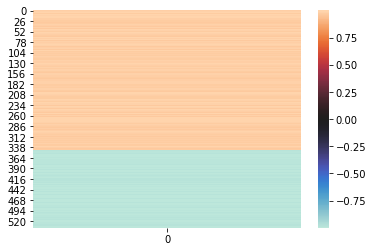

metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 42
Task 0 hypothetical scores:


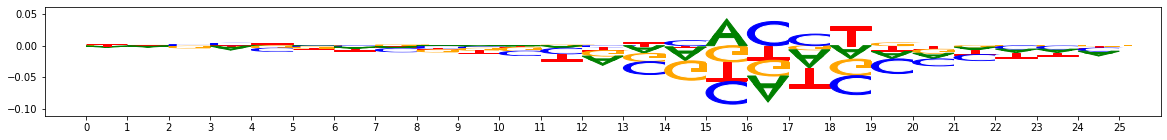

Task 0 actual importance scores:


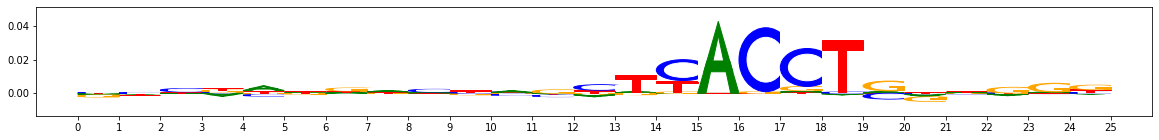

onehot, fwd and rev:


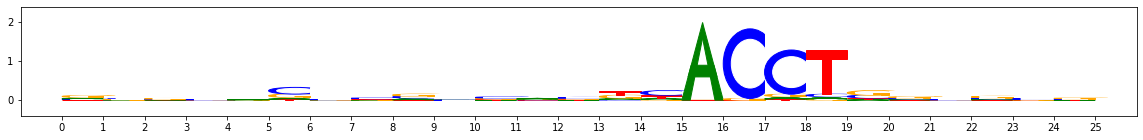

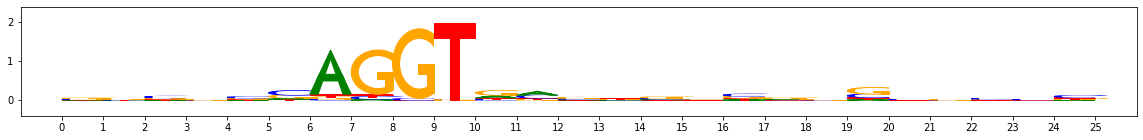

PLOTTING SUBCLUSTERS


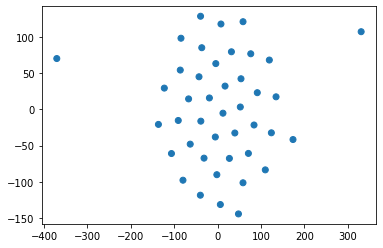

subcluster_0 size 42


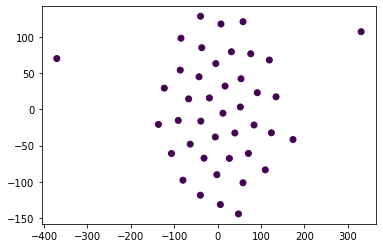

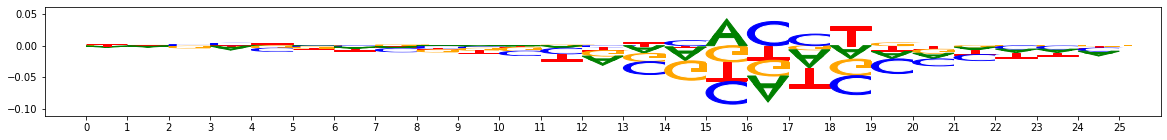

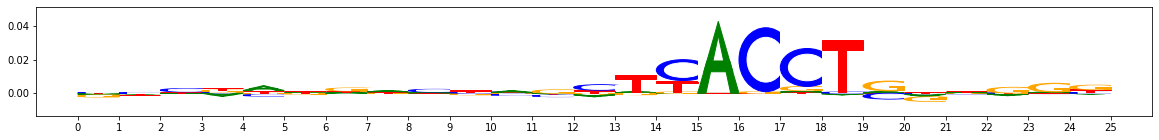

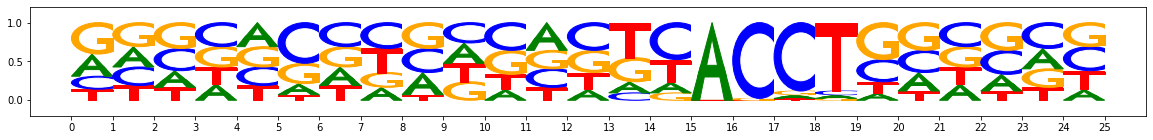

metacluster_0 pattern_1
total seqlets: 39
Task 0 hypothetical scores:


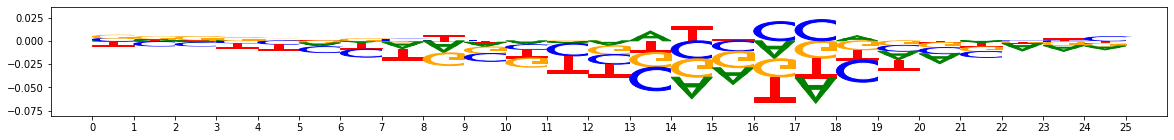

Task 0 actual importance scores:


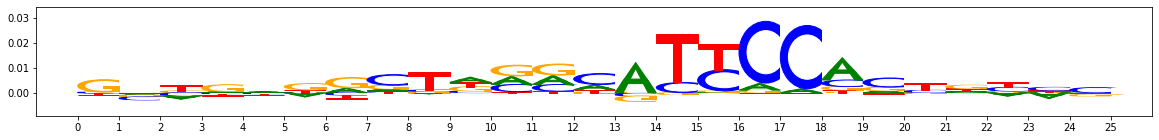

onehot, fwd and rev:


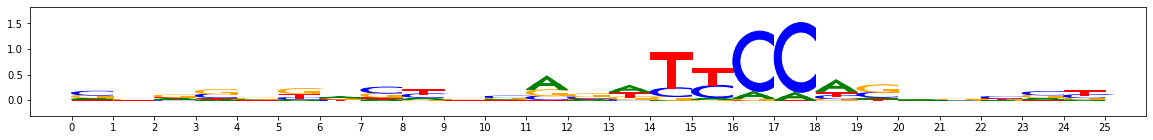

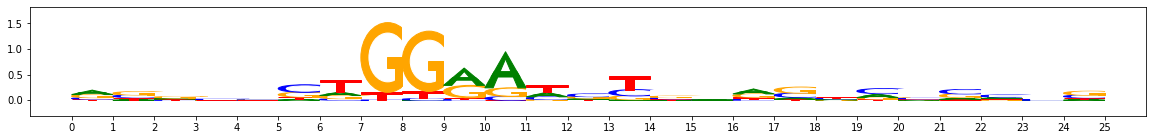

PLOTTING SUBCLUSTERS


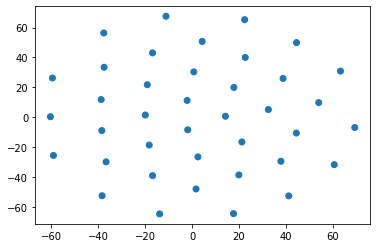

subcluster_0 size 39


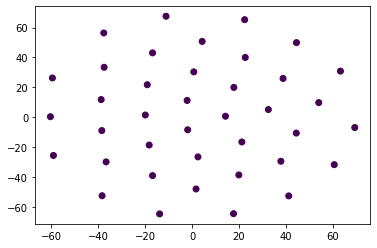

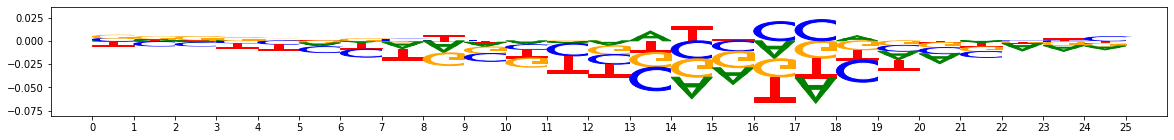

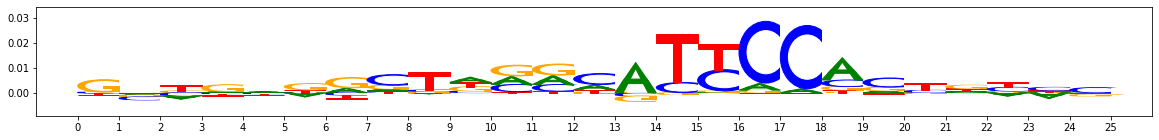

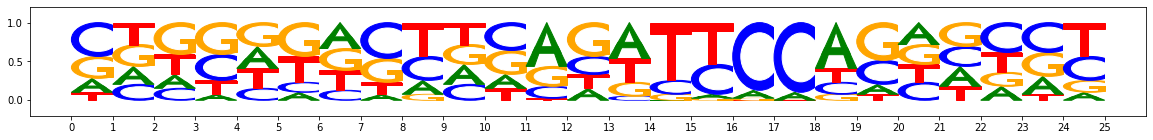

metacluster_1
activity pattern: [-1]
metacluster_1 pattern_0
total seqlets: 37
Task 0 hypothetical scores:


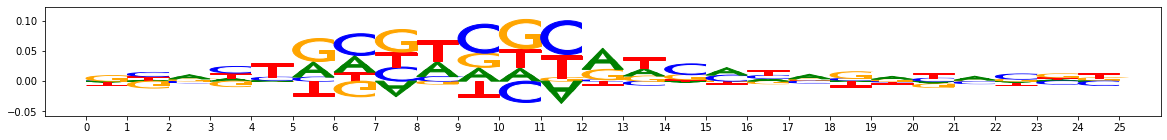

Task 0 actual importance scores:


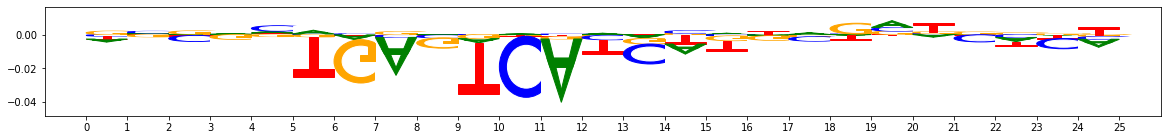

onehot, fwd and rev:


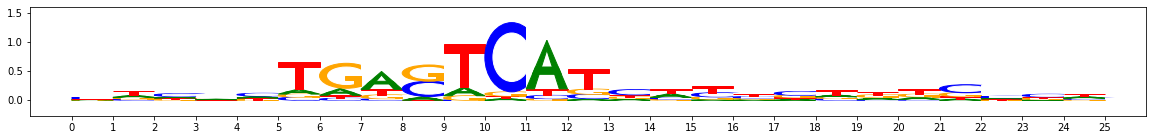

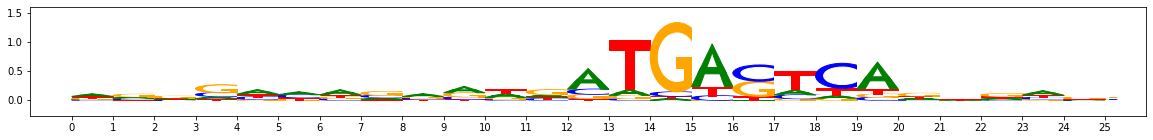

PLOTTING SUBCLUSTERS


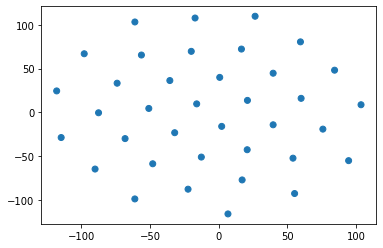

subcluster_0 size 37


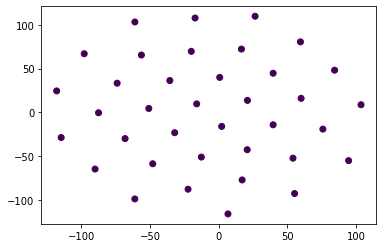

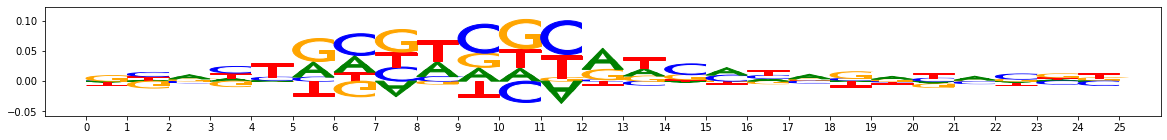

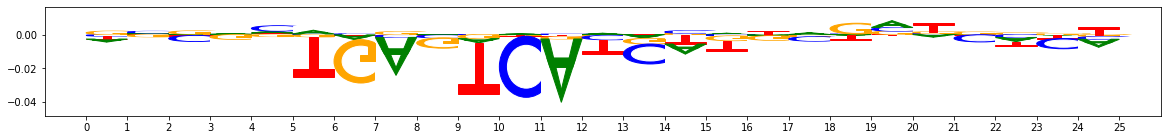

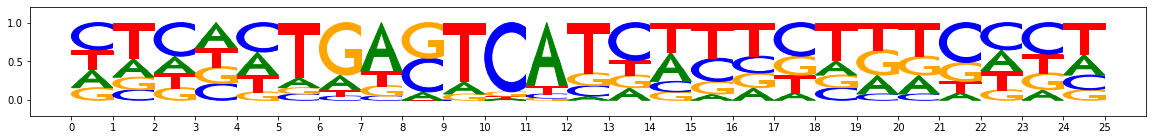

metacluster_1 pattern_1
total seqlets: 34
Task 0 hypothetical scores:


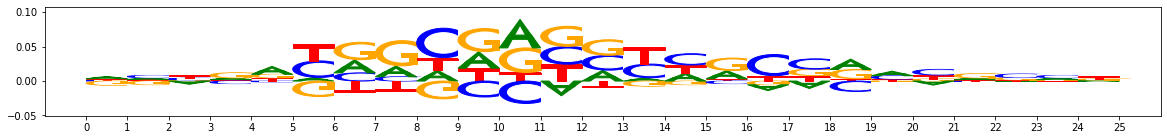

Task 0 actual importance scores:


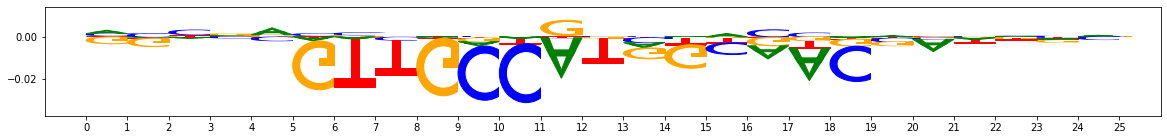

onehot, fwd and rev:


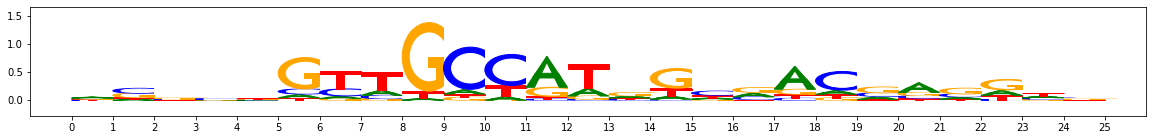

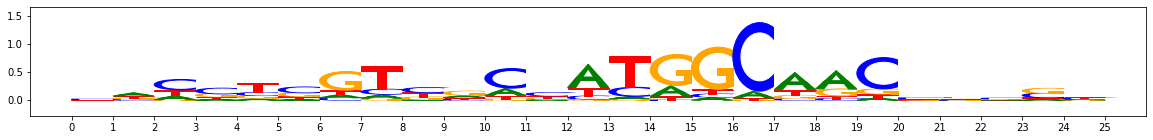

PLOTTING SUBCLUSTERS


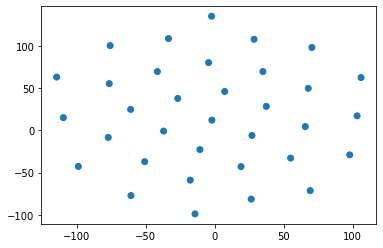

subcluster_0 size 34


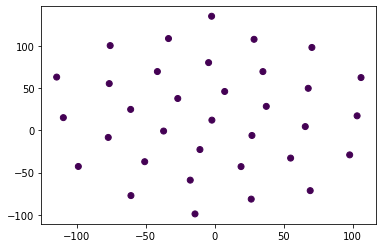

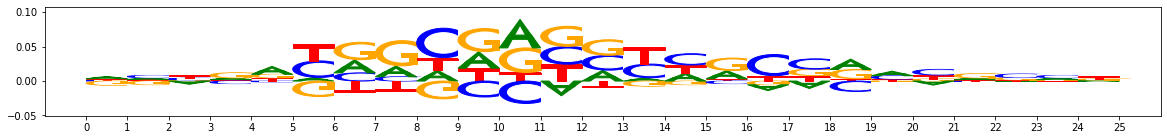

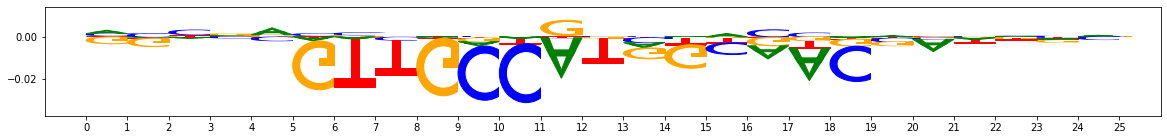

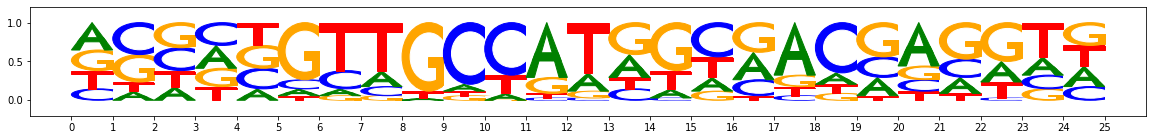

metacluster_1 pattern_2
total seqlets: 32
Task 0 hypothetical scores:


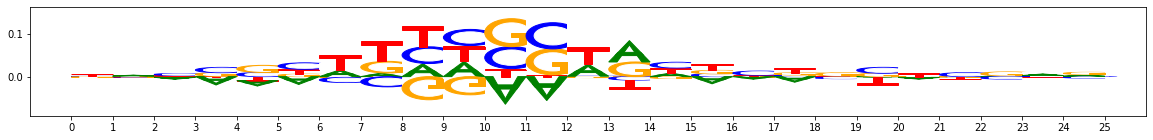

Task 0 actual importance scores:


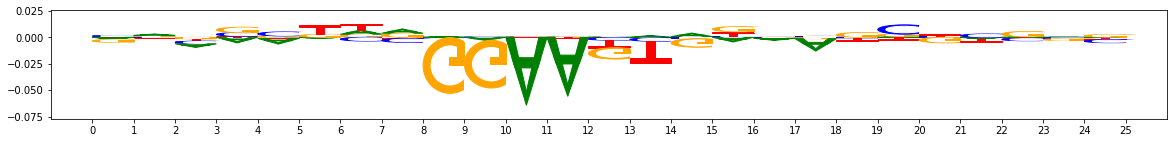

onehot, fwd and rev:


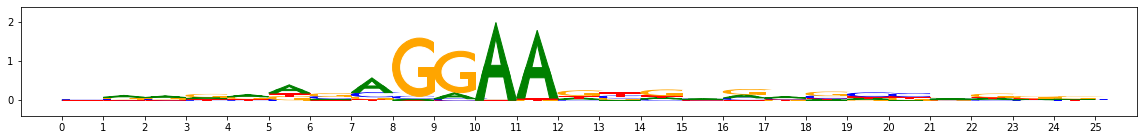

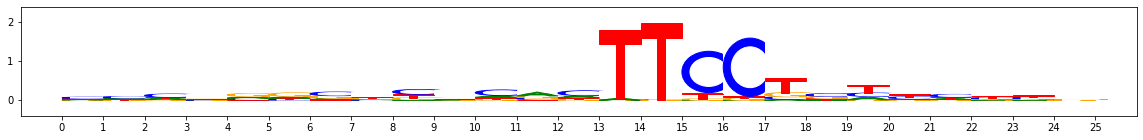

PLOTTING SUBCLUSTERS


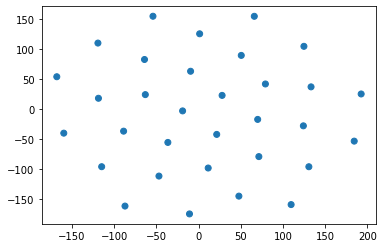

subcluster_0 size 32


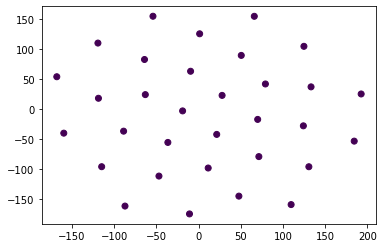

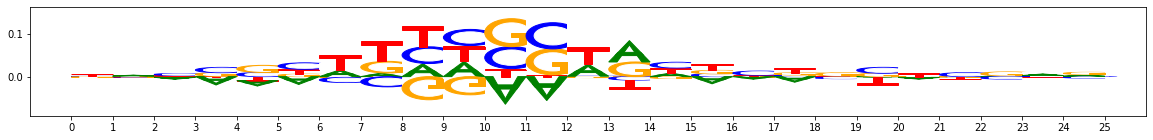

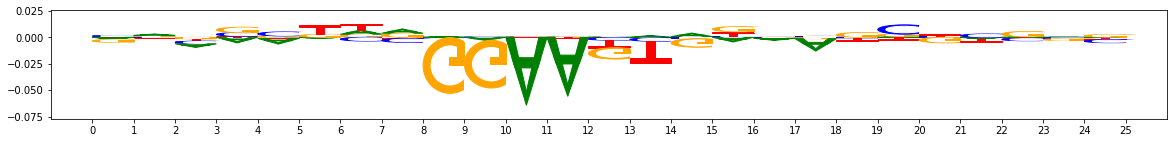

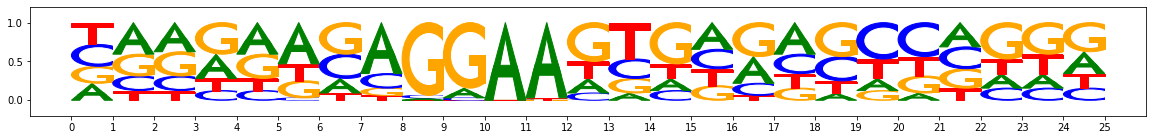

metacluster_1 pattern_3
total seqlets: 31
Task 0 hypothetical scores:


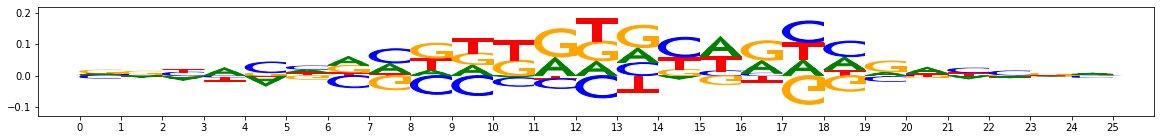

Task 0 actual importance scores:


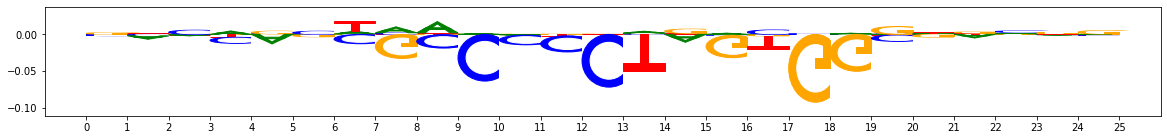

onehot, fwd and rev:


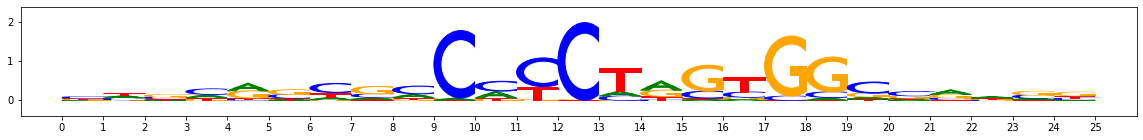

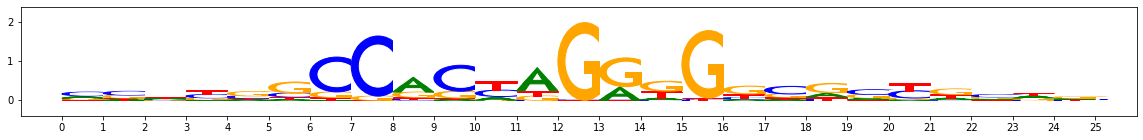

PLOTTING SUBCLUSTERS


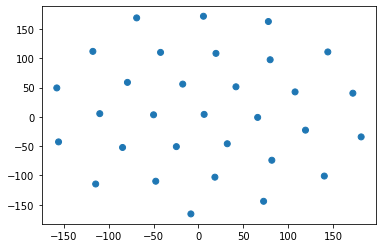

subcluster_0 size 31


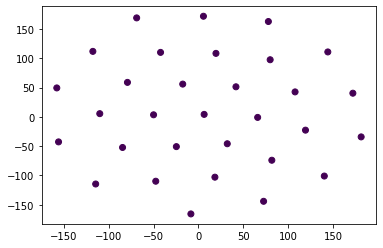

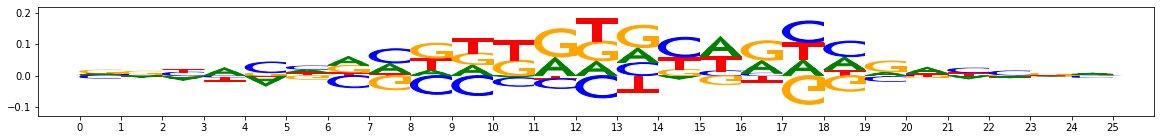

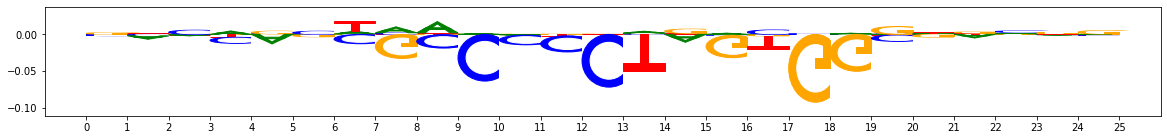

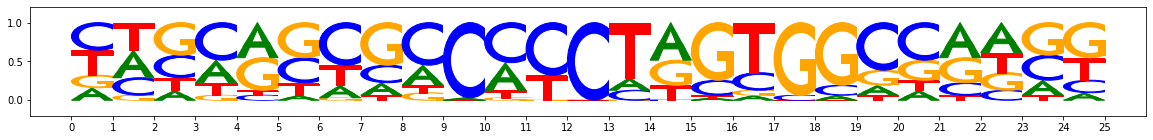

In [ ]:
from collections import Counter
import numpy as np

from modisco.visualization import viz_sequence
reload(viz_sequence)
from matplotlib import pyplot as plt

import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.aggregator
reload(modisco.aggregator)

hdf5_results = h5py.File("results.hdf5","r")

print("Metaclusters heatmap")
import seaborn as sns
activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]
sns.heatmap(activity_patterns, center=0)
plt.show()

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []
background = np.array([0.27, 0.23, 0.23, 0.27])

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["task0_contrib_scores"]["fwd"])
        #print("Task 1 hypothetical scores:")
        #viz_sequence.plot_weights(pattern["task1_hypothetical_contribs"]["fwd"])
        #print("Task 1 actual importance scores:")
        #viz_sequence.plot_weights(pattern["task1_contrib_scores"]["fwd"])
        #print("Task 2 hypothetical scores:")
        #viz_sequence.plot_weights(pattern["task2_hypothetical_contribs"]["fwd"])
        #print("Task 2 actual importance scores:")
        #viz_sequence.plot_weights(pattern["task2_contrib_scores"]["fwd"])
        print("onehot, fwd and rev:")
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["fwd"]),
                                                        background=background)) 
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["rev"]),
                                                        background=background)) 
        if ("subclusters" in pattern):
            print("PLOTTING SUBCLUSTERS")
            subclusters = np.array(pattern["subclusters"])
            twod_embedding = np.array(pattern["twod_embedding"])
            plt.scatter(twod_embedding[:,0], twod_embedding[:,1], c=subclusters, cmap="tab20")
            plt.show()
            for subcluster_name in list(pattern["subcluster_to_subpattern"]["subcluster_names"]):
                subpattern = pattern["subcluster_to_subpattern"][subcluster_name]
                print(subcluster_name.decode("utf-8"), "size", len(subpattern["seqlets_and_alnmts"]["seqlets"]))
                subcluster = int(subcluster_name.decode("utf-8").split("_")[1])
                plt.scatter(twod_embedding[:,0], twod_embedding[:,1], c=(subclusters==subcluster))
                plt.show()
                viz_sequence.plot_weights(subpattern["task0_hypothetical_contribs"]["fwd"])
                viz_sequence.plot_weights(subpattern["task0_contrib_scores"]["fwd"])
                viz_sequence.plot_weights(subpattern["sequence"]["fwd"])
hdf5_results.close()